# Machine-Learning

### Recommendations: Linear Reg, DTRegression, NeuralNetwork, SVM, LogisticReg

# Attempt 1: Linear Regression and DTRegression Model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV # Random Split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('data/clean_listing.csv')
df.head()

,Unnamed: 0.1,price,Unnamed: 0,index,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,...,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_since_years,distance_from_MRT,distance_from_Bus,distance_from_Mall,distance_from_School,distance_from_Food
0,0,81.0,0,1,0.9,1.34754,103.95958,1,1.0,1.0,...,0,0,1,0,12,0.842953,0.180102,7.976199,3.515767,0.785094
1,1,81.0,1,2,0.9,1.34531,103.96100,2,1.0,2.0,...,0,0,1,0,12,0.880282,0.205346,7.952045,3.786036,0.502588
2,2,52.0,2,3,1.0,1.29015,103.80814,1,1.0,1.0,...,0,0,1,0,12,0.549557,0.117975,4.230675,1.095807,0.169376
3,3,49.0,3,4,1.0,1.28836,103.81144,1,1.0,1.0,...,0,0,1,0,12,0.609339,0.040906,3.862544,0.685090,0.208523
4,4,175.0,4,5,0.9,1.34490,103.95979,4,3.0,5.0,...,0,0,1,0,12,0.738518,0.210803,7.816646,3.809634,0.506811


In [4]:
print(f"The standard deviation of price of listing is ${df['price'].std():.2f}.")

The standard deviation of price of listing is $132.36.


In [5]:
#Split data
Y = df['price']
X = df.iloc[:,4:]

In [6]:
X.head()

,host_response_rate,latitude,longitude,accommodates,bedrooms,beds,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,...,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_since_years,distance_from_MRT,distance_from_Bus,distance_from_Mall,distance_from_School,distance_from_Food
0,0.9,1.34754,103.95958,1,1.0,1.0,242,24,4.16,4.22,...,0,0,1,0,12,0.842953,0.180102,7.976199,3.515767,0.785094
1,0.9,1.34531,103.96100,2,1.0,2.0,305,47,4.41,4.39,...,0,0,1,0,12,0.880282,0.205346,7.952045,3.786036,0.502588
2,1.0,1.29015,103.80814,1,1.0,1.0,273,22,4.40,4.16,...,0,0,1,0,12,0.549557,0.117975,4.230675,1.095807,0.169376
3,1.0,1.28836,103.81144,1,1.0,1.0,281,14,4.50,4.69,...,0,0,1,0,12,0.609339,0.040906,3.862544,0.685090,0.208523
4,0.9,1.34490,103.95979,4,3.0,5.0,242,12,4.83,4.67,...,0,0,1,0,12,0.738518,0.210803,7.816646,3.809634,0.506811


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=45)

In [8]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_train_pred = reg.predict(X_train)
y_pred = reg.predict(X_test)

r2_score(y_test, y_pred)

0.6099153037190912

In [9]:
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(y_test, y_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Mean Squared Error (MSE) 	: 6549.5990784326605
Root Mean Squared Error (RMSE) 	: 80.92959334157476


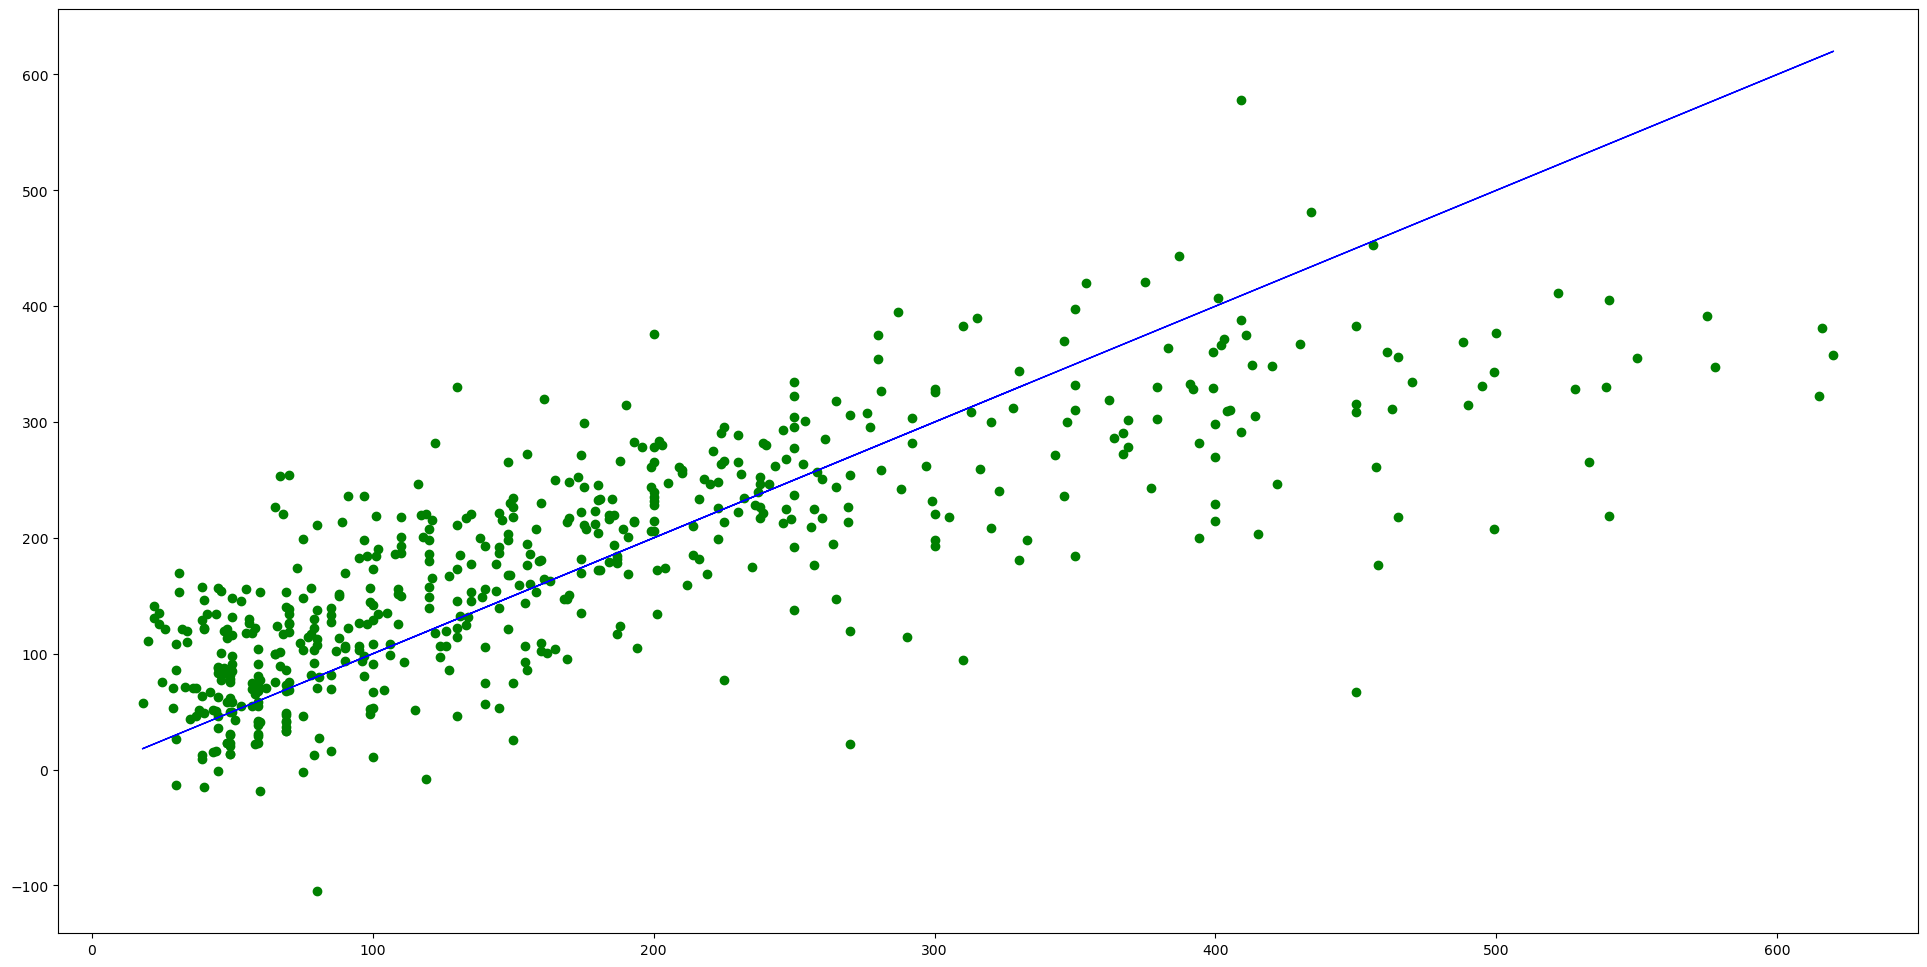

In [10]:
f, axes = plt.subplots(1,1, figsize=(24,12))    

    
axes.scatter(y_test,y_pred,color = "green")
axes.plot(y_test, y_test, 'b-', linewidth = 1)

In [11]:
# from sklearn.svm import SVR
# regressor=SVR(kernel='rbf')
# regressor.fit(X_train, y_train)
# predictions=regressor.predict(X_test)
#
# r2_score(y_test, predictions)

In [12]:
# mse = mean_sq_err(y_test, predictions)
# print("Mean Squared Error (MSE) \t:", mse)
# print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

In [13]:
# f, axes = plt.subplots(1,1, figsize=(24,12))
#
#
# axes.scatter(y_test,predictions,color = "green")
# axes.plot(y_test, y_test, 'b-', linewidth = 1)

# XGBoost Regression

We can use gradient boosting - a type of ensemble machine learning algorithms. Ensemble is a collection of decision trees. Every iteration, a decision tree is added to model to minimise the error. Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm, and the goal is to minimise loss gradient. We will use XGBoost API to do the model fitting.

In [14]:
import xgboost as xgb

cats = X.select_dtypes(exclude=np.number).columns.tolist()

for col in cats:
    X[col] = X[col].astype('category')

In [15]:
def xgBoost(predictor_train, predictor_test, response_train, response_test):
    """ Create a XGB regression model for given predictors and response. """
    dtrain_reg = xgb.DMatrix(predictor_train, response_train, enable_categorical=True)
    dtest_reg = xgb.DMatrix(predictor_test, response_test, enable_categorical=True)

    params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
    evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]

    n = 1000
    model = xgb.train(
        params = params,
        dtrain = dtrain_reg,
        num_boost_round = n,
        evals = evals,
        verbose_eval = 10,
        early_stopping_rounds = 100
    )

    preds = model.predict(dtest_reg)
    rmse = mean_squared_error(response_test, preds, squared=False)
    print(f"RMSE of the base model: {rmse:.3f}")
    return model

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=294)

model = xgBoost(X_train, X_test, y_train, y_test)

[0]	validation-rmse:169.61621	train-rmse:164.98828
[10]	validation-rmse:80.30654	train-rmse:41.77048
[20]	validation-rmse:78.55283	train-rmse:32.10686
[30]	validation-rmse:78.81231	train-rmse:26.06417
[40]	validation-rmse:78.84466	train-rmse:21.88116
[50]	validation-rmse:78.78574	train-rmse:18.03669
[60]	validation-rmse:78.70583	train-rmse:14.31588
[70]	validation-rmse:78.66676	train-rmse:12.52395
[80]	validation-rmse:78.96717	train-rmse:10.51829
[90]	validation-rmse:79.14135	train-rmse:8.63999
[100]	validation-rmse:79.03274	train-rmse:7.38582
[110]	validation-rmse:79.08551	train-rmse:6.29214
[120]	validation-rmse:79.09295	train-rmse:5.54345
[130]	validation-rmse:79.08959	train-rmse:4.75639
[140]	validation-rmse:79.09736	train-rmse:4.24387
[150]	validation-rmse:79.12982	train-rmse:3.70738
[160]	validation-rmse:79.16131	train-rmse:3.16822
[170]	validation-rmse:79.15519	train-rmse:2.70473
[180]	validation-rmse:79.17587	train-rmse:2.29199
[190]	validation-rmse:79.19075	train-rmse:1.96445


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

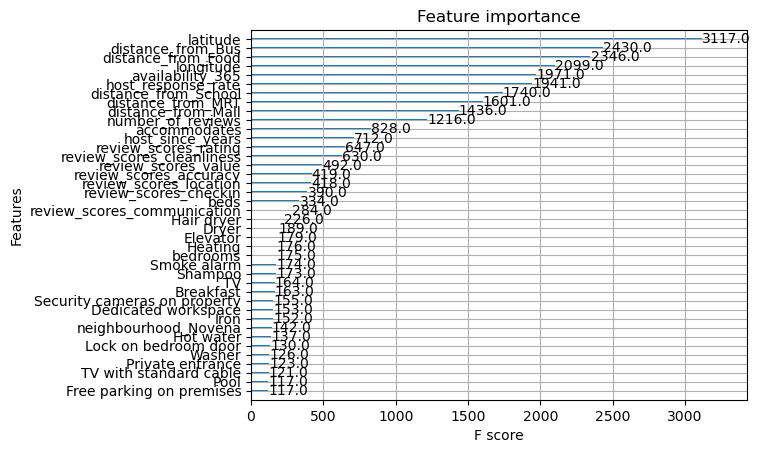

In [17]:
xgb.plot_importance(model, max_num_features=40)

# Attempt 2: Preventing Overfitting

[SciKit Learn GridSearch](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)

In [18]:
X = X.drop(columns=['latitude', 'longitude']) # Latitude, longitude is already represented in distance from amenities + zones
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=294)

model = xgBoost(X_train, X_test, y_train, y_test)

[0]	validation-rmse:169.36157	train-rmse:165.30850
[10]	validation-rmse:78.27218	train-rmse:42.98163
[20]	validation-rmse:76.87550	train-rmse:34.19640
[30]	validation-rmse:76.46360	train-rmse:26.04894
[40]	validation-rmse:76.78422	train-rmse:22.08378
[50]	validation-rmse:77.20136	train-rmse:18.38083
[60]	validation-rmse:76.92170	train-rmse:14.97090
[70]	validation-rmse:77.07845	train-rmse:12.56941
[80]	validation-rmse:77.22401	train-rmse:10.59006
[90]	validation-rmse:77.15036	train-rmse:9.19435
[100]	validation-rmse:77.22319	train-rmse:7.69667
[110]	validation-rmse:77.26827	train-rmse:6.74127
[120]	validation-rmse:77.16126	train-rmse:5.87369
[130]	validation-rmse:77.24244	train-rmse:4.96337
[140]	validation-rmse:77.21493	train-rmse:4.28924
[150]	validation-rmse:77.26463	train-rmse:3.76161
[160]	validation-rmse:77.22935	train-rmse:3.34851
[170]	validation-rmse:77.24903	train-rmse:2.86411
[180]	validation-rmse:77.21157	train-rmse:2.44555
[190]	validation-rmse:77.20667	train-rmse:2.12561


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

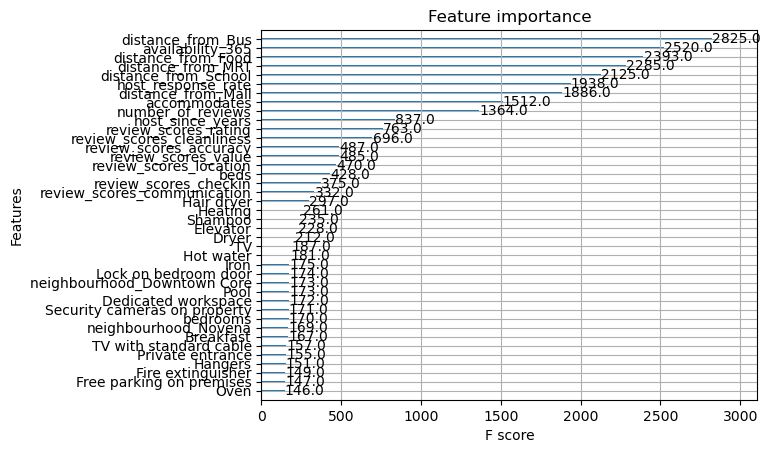

In [19]:
xgb.plot_importance(model, max_num_features=40)

# Parameters Tuning

<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width="800" height="400">

With GridSearchCV, we can do multiple runs of cross-validation, each with an unique set of parameters, to optimize for cross-validation score (R^2).

In [20]:
help(xgb.XGBRegressor) #XGBRegressor with Sklearn API

Help on class XGBRegressor in module xgboost.sklearn:

class XGBRegressor(XGBModel, sklearn.base.RegressorMixin)
 |  XGBRegressor(*, objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'reg:squarederror', **kwargs: Any) -> None
 |  
 |  Implementation of the scikit-learn API for XGBoost regression.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of gradient boosted trees.  Equivalent to number of boosting
 |          rounds.
 |  
 |      max_depth :  Optional[int]
 |          Maximum tree depth for base learners.
 |      max_leaves :
 |          Maximum number of leaves; 0 indicates no limit.
 |      max_bin :
 |          If using histogram-based algorithm, maximum number of bins per feature
 |      grow_policy :
 |          Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
 |          depth-wise. 1: favor splitting at nodes with highest loss change.
 | 

This may take a few minutes.

In [21]:
clf = GridSearchCV(
    xgb.XGBRegressor(), {
        'learning_rate': [.03, .05, .07],
        'max_depth': [5, 6, 7],
        'objective': ['reg:squarederror'],
        'n_estimators': [1000],
        'tree_method': ['gpu_hist']
    },
    cv = 5,
    n_jobs = 5,
    verbose = True
)

clf.fit(X_train, y_train);

Fitting 5 folds for each of 9 candidates, totalling 45 fits


Score refers to $R^2$, so higher is better.

In [22]:
estimator = clf.best_estimator_
y_pred = estimator.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
rmse = np.sqrt(mse)
print(f"R^2 score is {clf.best_score_}", f"Parameters: {clf.best_params_}", f"Mean squared error {rmse:3f}", sep="\n")

R^2 score is 0.7363820310457423
Parameters: {'learning_rate': 0.03, 'max_depth': 7, 'n_estimators': 1000, 'objective': 'reg:squarederror', 'tree_method': 'gpu_hist'}
Mean squared error 74.917855
